In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from IPython.display import Image

## Importing from files

In [2]:
Sg=np.genfromtxt("red_g1.log", skip_header=70, usecols=(1, 14, 15, 28, 29) ,unpack=True)
Si=np.genfromtxt("red_i1.log", skip_header=70, usecols=(1, 14, 15, 28, 29) ,unpack=True)
Sr=np.genfromtxt("red_r1.log", skip_header=70, usecols=(1, 14, 15, 28, 29) ,unpack=True)

# name/number mjd flag expose ccd fwhm beta [naper x y xm ym exm eym counts sigma sky nsky nrej worst error_flag]*num_aper

sigma_Sg_tar = Sg[2]
sigma_Si_tar = Si[2]
sigma_Sr_tar = Sr[2]

sigma_Sg_ref = Sg[4]
sigma_Si_ref = Si[4]
sigma_Sr_ref = Sr[4]

mg=2.5*np.log10(Sg[3]/Sg[1])+18.4384+0.417
mi=2.5*np.log10(Si[3]/Si[1])+16.8339+0.214
mr=2.5*np.log10(Sr[3]/Sr[1])+17.3545+0.288

## Error analysis

$\Delta m = 2.5 \log_{10}(\frac{S_{ref}}{S_{tar}})$

$\sigma_{\Delta m} = \sqrt{(\frac{\partial \Delta m}{\partial S_{ref}} \sigma_{S_{ref}})^2 + (\frac{\partial \Delta m}{\partial S_{tar}} \sigma_{S_{tar}})^2}$

$\frac{\partial \Delta m}{\partial S_{ref}} = \frac{2.5}{\ln(10) S_{ref}}$

$\frac{\partial \Delta m}{\partial S_{tar}} = -\frac{2.5}{\ln(10) S_{tar}}$

$\sigma_{\Delta m} = \sqrt{(\frac{2.5}{\ln(10) S_{ref}} \sigma_{S_{ref}})^2 + (\frac{2.5}{\ln(10) S_{tar}} \sigma_{S_{tar}})^2}$

In [3]:
def create_sigma_dm(S_tar, S_ref, sigma_S_tar, sigma_S_ref):
    term1 = ((2.5)/(np.log(10)*S_tar)) * sigma_S_tar
    term2 = ((2.5)/(np.log(10)*S_ref)) * sigma_S_ref
    return np.sqrt(term1**2 + term2**2)

sigma_dmg = create_sigma_dm(Sg[1], Sg[3], sigma_Sg_tar, sigma_Sg_ref)
sigma_dmi = create_sigma_dm(Si[1], Si[3], sigma_Si_tar, sigma_Si_ref)
sigma_dmr = create_sigma_dm(Sr[1], Sr[3], sigma_Sr_tar, sigma_Sr_ref)

### Plotting counts

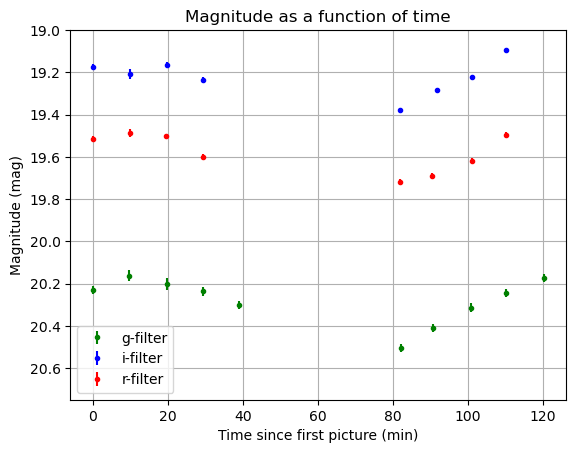

In [9]:
def days_to_min(arr): # Converting from modified julian days to seconds
    return 24*60*arr

def min_since_start(arr):
    arr_min = days_to_min(arr)
    return arr_min - arr_min[0]

Sg0_min = min_since_start(Sg[0])
Si0_min = min_since_start(Si[0])
Sr0_min = min_since_start(Sr[0])


plt.figure()
plt.errorbar(Sg0_min, mg, yerr=sigma_dmg, fmt=".", ecolor="g", color="g", label="g-filter")
plt.errorbar(Si0_min, mi, yerr=sigma_dmi, fmt=".", ecolor="b", color="b", label="i-filter")
plt.errorbar(Sr0_min, mr, yerr=sigma_dmr, fmt=".", ecolor="r", color="r", label="r-filter")

#plt.plot(Sg0_min, mg, ".g", label="g-filter")
#plt.plot(Si0_min, mi, ".b", label="i-filter")
#plt.plot(Sr0_min, mr, ".r", label="r-filter")
plt.title("Magnitude as a function of time")
plt.xlabel("Time since first picture (min)")
plt.ylabel("Magnitude (mag)")
plt.ylim(20.75, 19)
plt.legend()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 9.76927700e-05 -3.96966537e-06  2.58304560e-03 -5.58883238e-05]
 [-3.96966537e-06  1.60236162e-06 -1.96873456e-03  5.82783380e-06]
 [ 2.58304560e-03 -1.96873456e-03  3.06731524e+00 -4.54728026e-03]
 [-5.58883238e-05  5.82783380e-06 -4.54728026e-03  7.08829095e-05]]
1 -0.1777974171628487 0.009883965297586788
2 0.05641055634243831 0.0012658442308419303
3 13.378759571649727 1.7513752419020447
4 20.35004513884841 0.008419198862882865


Period = 111.38314731444466 min = 1.8563857885740775 h
Error = $\Delta P = \frac{2\pi}{T^2} \Delta T$ = 0.041657012322631366 h


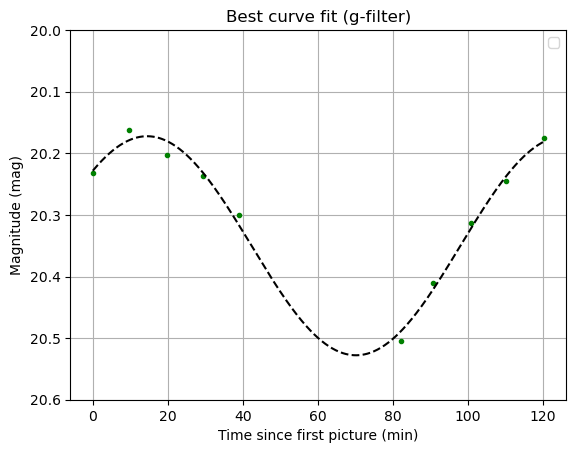

In [5]:
def sin_func(x, a, b, c, d):
    return a*np.sin(b*(x+c))+d

p, dp = optimize.curve_fit(sin_func, Sg0_min, mg, p0=[0.35,0.06,0.1,20.33])
print(dp)
for i in range(len(p)):
    print(i+1, p[i], np.sqrt(abs(dp[i][i])))

print("\n")   
print(f"Period = {2*np.pi/p[1]} min = {(2*np.pi/p[1])/60} h")
print(r"Error = $\Delta P = \frac{2\pi}{T^2} \Delta T$ =", (2*np.pi)/(p[1]**2)*(np.sqrt(abs(dp[1][1])))/60, "h")
    
t0=Sg0_min
t=np.linspace(t0[0],t0[len(t0)-1],500)

plt.figure()
plt.plot(Sg0_min,mg,".g")
plt.plot(t,p[0]*np.sin(p[1]*(t+p[2]))+p[3], "--k")
plt.title("Best curve fit (g-filter)")
plt.xlabel("Time since first picture (min)")
plt.ylabel("Magnitude (mag)")
plt.ylim(20.6, 20)
plt.legend()
plt.grid()
plt.show()



"""
def sin_func(x, a, b, c, d):
    return a*np.sin(b*(x+c))+d

p, dp = optimize.curve_fit(sin_func, Sg[0], mg, p0=[0.35,74,0.1,20.33])

for i in range(len(p)):
    print(i+1, p[i], np.sqrt(abs(dp[i][i])))

print(Sg[0])
t0=Sg[0]-60054
t=np.linspace(t0[0],t0[len(t0)-1],500)
plt.figure()
plt.plot(t0,mg,"*b")
plt.plot(t,p[0]*np.sin(p[1]*(t+p[2]))+p[3], "r")
plt.show()""";

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 -0.1645177223487043 0.04180021731854166
2 0.06087009338689031 0.004743569886596046
3 14.42792636361463 5.588299618301962
4 19.3135933091445 0.03701863114558245


Period = 103.22286294590778 min = 1.720381049098463 h
Error = $\Delta P = \frac{2\pi}{T^2} \Delta T$ = 0.13406826380410278 h


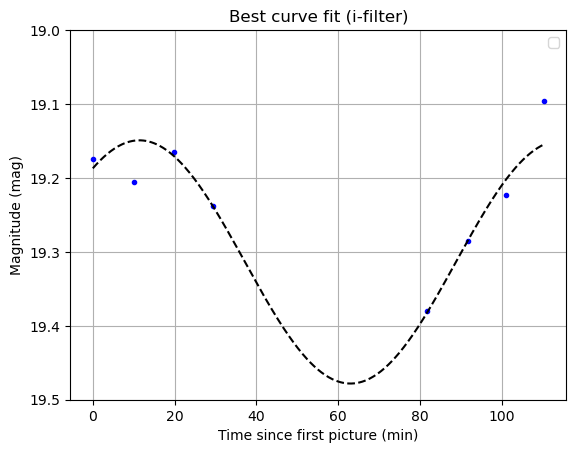

In [6]:
def sin_func(x, a, b, c, d):
    return a*np.sin(b*(x+c))+d

p, dp = optimize.curve_fit(sin_func, Si0_min, mi, p0=[0.35,0.06,0.1,20.33])

for i in range(len(p)):
    print(i+1, p[i], np.sqrt(abs(dp[i][i])))

print("\n")   
print(f"Period = {2*np.pi/p[1]} min = {(2*np.pi/p[1])/60} h")
print(r"Error = $\Delta P = \frac{2\pi}{T^2} \Delta T$ =", (2*np.pi)/(p[1]**2)*(np.sqrt(abs(dp[1][1])))/60, "h")

t0=Si0_min
t=np.linspace(t0[0],t0[len(t0)-1],500)

plt.figure()
plt.plot(Si0_min,mi,".b")
plt.plot(t,p[0]*np.sin(p[1]*(t+p[2]))+p[3], "--k")
plt.title("Best curve fit (i-filter)")
plt.xlabel("Time since first picture (min)")
plt.ylabel("Magnitude (mag)")
plt.ylim(19.5, 19)
plt.legend()
plt.grid()
plt.show()


"""
def sin_func(x, a, b, c, d):
    return a*np.sin(b*(x+c))+d
p, dp = optimize.curve_fit(sin_func, Si[0], mi, p0=[0.35,74,0.19,19.25])
for i in range(len(p)):
    print(i+1, p[i], np.sqrt(abs(dp[i][i])))
print(Si[0])
t0=Si[0]-60054
t=np.linspace(t0[0],t0[len(t0)-1],500)
plt.figure()
plt.plot(t0,mi,"*b")
plt.plot(t,p[0]*np.sin(p[1]*(t+p[2]))+p[3], "r")
plt.show()""";

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 -0.15429879283557488 0.022286147289635173
2 0.054386846001110364 0.003658263953126202
3 21.034757152622465 5.618570690616852
4 19.643679651165986 0.02097298487115584


Period = 115.52766466824181 min = 1.9254610778040302 h
Error = $\Delta P = \frac{2\pi}{T^2} \Delta T$ = 0.1295137587852438 h


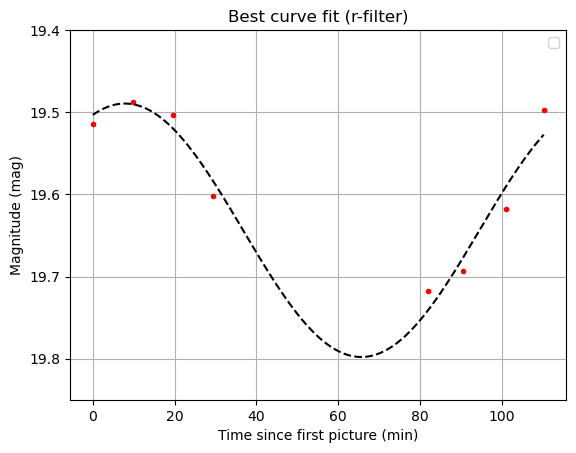

In [23]:
def sin_func(x, a, b, c, d):
    return a*np.sin(b*(x+c))+d

p, dp = optimize.curve_fit(sin_func, Sr0_min, mr, p0=[0.35,0.06,0.1,20.33])

for i in range(len(p)):
    print(i+1, p[i], np.sqrt(abs(dp[i][i])))

print("\n")   
print(f"Period = {2*np.pi/p[1]} min = {(2*np.pi/p[1])/60} h")
print(r"Error = $\Delta P = \frac{2\pi}{T^2} \Delta T$ =", (2*np.pi)/(p[1]**2)*(np.sqrt(abs(dp[1][1])))/60, "h")

t0=Sr0_min
t=np.linspace(t0[0],t0[len(t0)-1],500)

plt.figure()
plt.plot(Sr0_min,mr,".r")
plt.plot(t,p[0]*np.sin(p[1]*(t+p[2]))+p[3], "--k")
plt.title("Best curve fit (r-filter)")
plt.xlabel("Time since first picture (min)")
plt.ylabel("Magnitude (mag)")
plt.ylim(19.85, 19.4)
plt.legend()
plt.grid()
plt.show()


"""
def sin_func(x, a, b, c, d):
    return a*np.sin(b*(x+c))+d
p, dp = optimize.curve_fit(sin_func, Sr[0], mr, p0=[0.35,74,0.1,19.55])
for i in range(len(p)):
    print(i+1, p[i], np.sqrt(abs(dp[i][i])))
print(Sr[0])
t0=Sr[0]-60054
t=np.linspace(t0[0],t0[len(t0)-1],500)
plt.figure()
plt.plot(t0,mr,"*b")
plt.plot(t,p[0]*np.sin(p[1]*(t+p[2]))+p[3], "r")
plt.show()""";